In [11]:
%pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [2]:
from dotenv import load_dotenv
import os
import pandas as pd
import matplotlib.pyplot as plt


load_dotenv()

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

PARQUET_PATH = os.getenv("PARQUET_PATH")
assert PARQUET_PATH is not None, "PARQUET_PATH környezeti változó hiányzik!"

In [3]:
df = pd.read_parquet(PARQUET_PATH)
df.shape
df.head()
df.columns
df.info()
df.describe()
df.isnull().sum()
df.isnull().sum().sum()
df.isnull().sum().sum() / df.size
df.isnull().sum().sum() / df.size * 100
df.isnull().sum().sum() / df.size * 100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213398 entries, 0 to 213397
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   doc_id                 213398 non-null  object 
 1   MeghozoBirosag         213116 non-null  object 
 2   JogTerulet             213115 non-null  object 
 3   Jogszabalyhelyek       213047 non-null  object 
 4   HatarozatEve           213116 non-null  float64
 5   AllKapcsolodoUgyszam   174188 non-null  object 
 6   AllKapcsolodoBirosag   174188 non-null  object 
 7   KapcsolodoHatarozatok  174188 non-null  object 
 8   text                   213398 non-null  object 
 9   embedding              213351 non-null  object 
dtypes: float64(1), object(9)
memory usage: 16.3+ MB


np.float64(5.5705770438335875)

In [4]:
df["text_length"] = df["text"].apply(lambda x: len(str(x).split()))
df["text_length"].describe()

count    213398.000000
mean       3479.986424
std        4562.398560
min           8.000000
25%        1704.000000
50%        2555.000000
75%        3941.000000
max      222545.000000
Name: text_length, dtype: float64

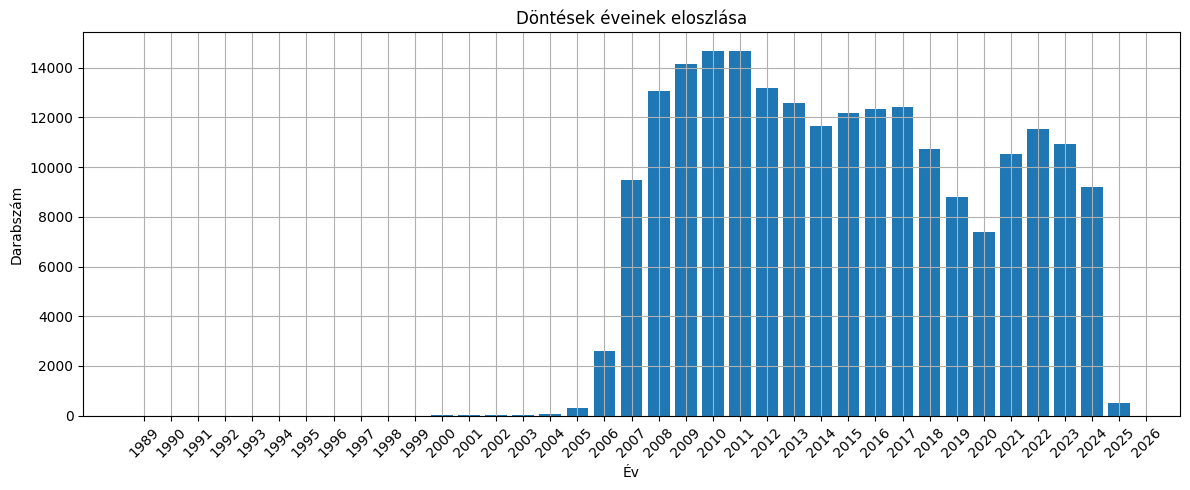

In [17]:
years = df["HatarozatEve"]  # vagy amit használsz

bins = list(range(int(years.min()), int(years.max()) + 2))  # egész bin-határok

plt.figure(figsize=(12, 5))
plt.hist(years, bins=bins, align="left", rwidth=0.8)
plt.title("Döntések éveinek eloszlása")
plt.xlabel("Év")
plt.ylabel("Darabszám")
plt.xticks(bins, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()